STEP 1: Loading & Visualizing Dataset...
 - Data Shape: (1797, 64) (1797 images, 64 pixels each)
 - Classes: [0 1 2 3 4 5 6 7 8 9]


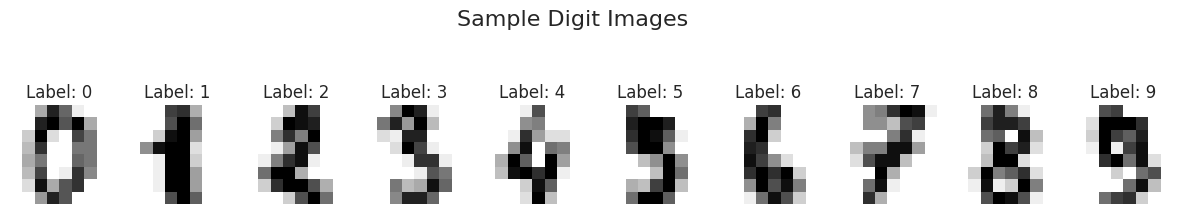


STEP 2: Preprocessing (Scaling)...
 - Training Set: 1437 samples
 - Testing Set:  360 samples

STEP 3: Finding Best K (Hyperparameter Tuning)...
 - K=1: Accuracy = 0.9667
 - K=3: Accuracy = 0.9667
 - K=5: Accuracy = 0.9639
 - K=7: Accuracy = 0.9667
 - K=9: Accuracy = 0.9639
 - K=11: Accuracy = 0.9639
 - K=13: Accuracy = 0.9694
 - K=15: Accuracy = 0.9556


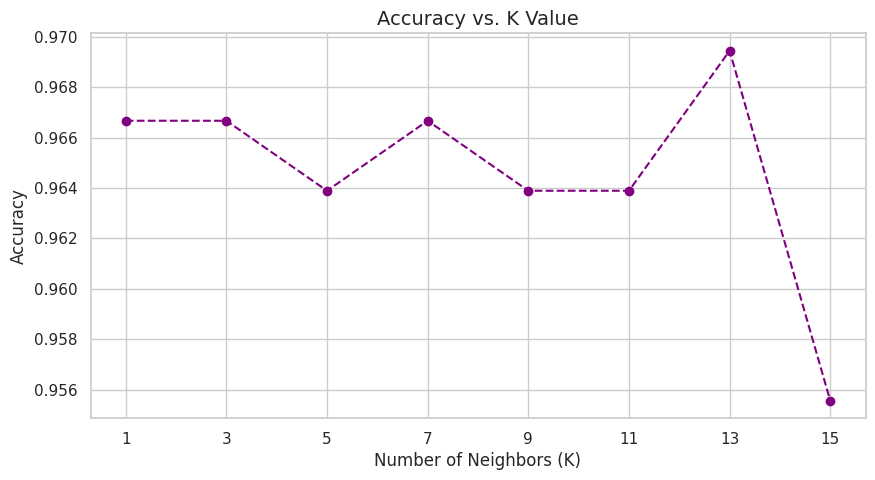

 🏆 Best K found: 13 (Accuracy: 96.94%)

STEP 4: Training Final Model (K=13)...

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      0.97      0.93        36
           2       0.97      1.00      0.99        35
           3       1.00      0.97      0.99        37
           4       0.97      0.97      0.97        36
           5       0.95      0.97      0.96        37
           6       0.97      1.00      0.99        36
           7       0.97      0.97      0.97        36
           8       1.00      0.89      0.94        35
           9       0.97      0.94      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



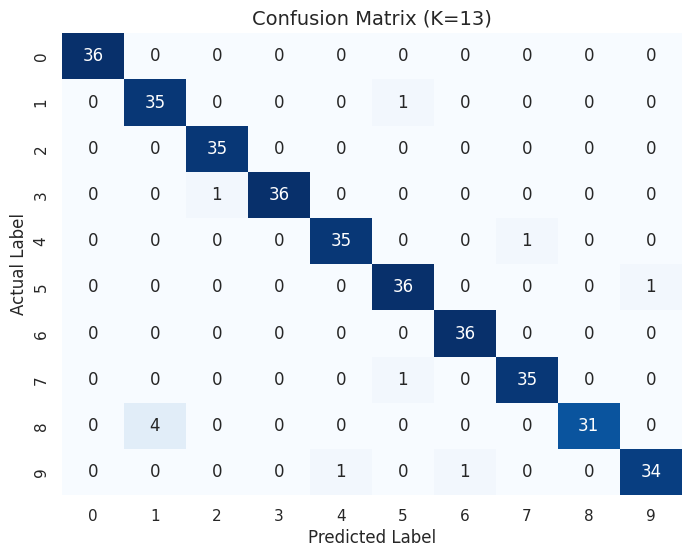


STEP 5: Visualizing Predictions...


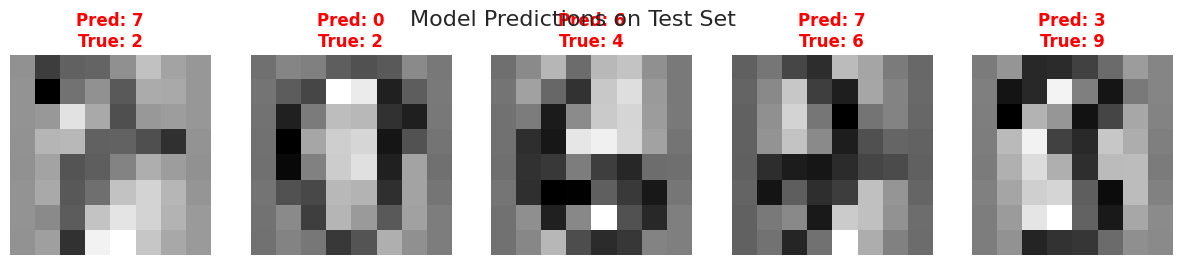

In [6]:
# TASK 10: KNN – Handwritten Digit Classification
# Dataset: Scikit-Learn Digits (8x8 pixel images)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# SETTING PROFESSIONAL VISUALIZATION THEME
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

def load_and_visualize_data():
    """
    Loads the Digits dataset and displays sample images.
    """
    print("STEP 1: Loading & Visualizing Dataset...")
    digits = load_digits()

    # Feature Data (64 pixels per image)
    X = digits.data
    y = digits.target

    print(f" - Data Shape: {X.shape} (1797 images, 64 pixels each)")
    print(f" - Classes: {np.unique(y)}")

    # VISUALIZATION: Show first 10 images
    fig, axes = plt.subplots(1, 10, figsize=(15, 3))
    for ax, image, label in zip(axes, digits.images, digits.target):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f'Label: {label}')
    plt.suptitle("Sample Digit Images", fontsize=16)
    plt.show()

    return X, y, digits.images

def preprocess_data(X, y):
    """
    Splits and Scales data. Scaling is CRITICAL for KNN (Distance-based).
    """
    print("\nSTEP 2: Preprocessing (Scaling)...")

    # Split 80/20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scaling: KNN calculates Euclidean distance.
    # If one pixel ranges 0-1 and another 0-100, the distance is skewed.
    # StandardScaler fixes this.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f" - Training Set: {X_train.shape[0]} samples")
    print(f" - Testing Set:  {X_test.shape[0]} samples")

    return X_train_scaled, X_test_scaled, y_train, y_test

def find_best_k(X_train, X_test, y_train, y_test):
    """
    Loops through K=1 to 15 to find the optimal number of neighbors.
    """
    print("\nSTEP 3: Finding Best K (Hyperparameter Tuning)...")

    k_values = range(1, 16, 2) # Test odd numbers 1, 3, 5... 15
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        accuracies.append(score)
        print(f" - K={k}: Accuracy = {score:.4f}")

    # Plot Accuracy vs K
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, accuracies, marker='o', linestyle='--', color='purple')
    plt.title('Accuracy vs. K Value', fontsize=14)
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    # Return best K
    best_k = k_values[np.argmax(accuracies)]
    print(f" 🏆 Best K found: {best_k} (Accuracy: {max(accuracies):.2%})")
    return best_k

def train_and_evaluate(X_train, X_test, y_train, y_test, best_k):
    """
    Trains the final model using the Best K and generates reports.
    """
    print(f"\nSTEP 4: Training Final Model (K={best_k})...")

    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    # Evaluation
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix (K={best_k})', fontsize=14)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    return knn, y_pred

def visualize_predictions(model, X_test, y_test, X_test_original_scale):
    """
    Shows 5 random test images with their predicted labels.
    """
    print("\nSTEP 5: Visualizing Predictions...")

    # Pick 5 random indices
    indices = np.random.choice(len(X_test), 5, replace=False)

    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    for i, idx in enumerate(indices):
        # Predict single image
        pred = model.predict([X_test[idx]])[0]
        true = y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]

        # Reshape back to 8x8 image for display (Use unscaled data if available, or just reshape scaled)
        # Note: Scaled data looks weird visually, but structure is there.
        # Ideally we reshape the original pixel data, but for simplicity here:
        image = X_test[idx].reshape(8, 8)

        axes[i].set_axis_off()
        axes[i].imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

        # Color title Green if Correct, Red if Wrong
        color = 'green' if pred == true else 'red'
        axes[i].set_title(f"Pred: {pred}\nTrue: {true}", color=color, fontweight='bold')

    plt.suptitle("Model Predictions on Test Set", fontsize=16)
    plt.show()

# MAIN EXECUTION
if __name__ == "__main__":
    # 1. Load
    X_raw, y_raw, _ = load_and_visualize_data()

    # 2. Preprocess
    X_tr, X_te, y_tr, y_te = preprocess_data(X_raw, y_raw)

    # 3. Find Best K
    optimal_k = find_best_k(X_tr, X_te, y_tr, y_te)

    # 4. Train Final
    final_model, predictions = train_and_evaluate(X_tr, X_te, y_tr, y_te, optimal_k)

    # 5. Show Results
    visualize_predictions(final_model, X_te, y_tr, X_raw)